<a href="https://colab.research.google.com/github/jyotidabass/Handling-missing-values-feature-selection/blob/main/Handling_missing_values_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 49.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


   surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0       no  adult           530101         38.5   66.0              28.0   
1      yes  adult           534817         39.2   88.0              20.0   
2       no  adult           530334         38.3   40.0              24.0   
3      yes  young          5290409         39.1  164.0              84.0   
4       no  adult           530255         37.3  104.0              35.0   
5       no  adult           528355          NaN    NaN               NaN   
6      yes  adult           526802         37.9   48.0              16.0   
7      yes  adult           529607          NaN   60.0               NaN   
8       no  adult           530051          NaN   80.0              36.0   
9       no  young          5299629         38.3   90.0               NaN   
10     yes  adult           528548         38.1   66.0              12.0   
11      no  adult           527927         39.1   72.0              52.0   
12     yes  

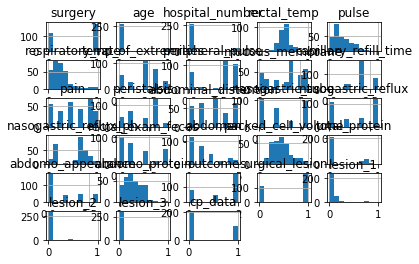

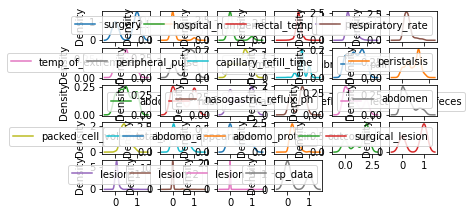

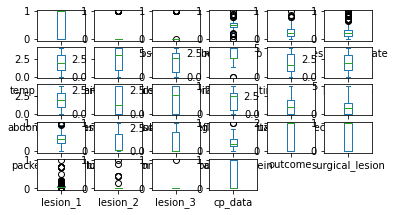

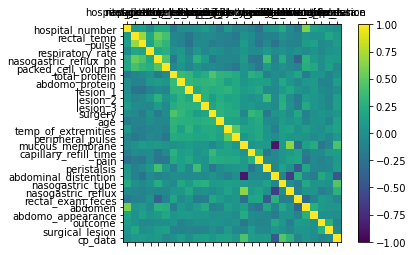

LR: 0.854044 (0.061542)
LDA: 0.841176 (0.092700)
KNN: 0.756250 (0.071555)
CART: 0.877574 (0.062241)
NB: 0.628676 (0.131677)
SVM: 0.798897 (0.131678)


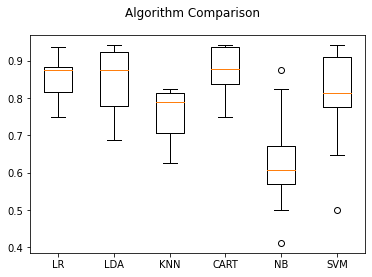

In [4]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
from sklearn.impute import KNNImputer
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from numpy import mean
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# load dataset
dataframe = pd.read_csv('/content/horsecolic.csv')
# split into input and output elements
data = dataframe.values
print(dataframe.head(30))
print(dataframe.shape)
print(dataframe.dtypes)



#General Mıssıng Values Function
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

df_missing= missing_values_table(dataframe)
print(missing_values_table(dataframe))



#Split up the data to categorical and numerical
numerical_ix = dataframe.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = dataframe.select_dtypes(include=['object', 'bool']).columns
print(numerical_ix)
print(categorical_ix)



#Categorical imputation for missing categorical values

imputer = CategoricalImputer(variables=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],)
# fit the imputer
imputer.fit(dataframe[categorical_ix])
# transform the data
dataframe[categorical_ix] = imputer.transform(dataframe[categorical_ix])

#check the dataframe for categorical imputation for categorical features
df_missing= missing_values_table(dataframe)
print(missing_values_table(dataframe))

#İmputer for numerical features for missing numerical features
# define imputer
imputer2 = KNNImputer()
# fit on the dataset
imputer2.fit(dataframe[numerical_ix])
# transform the dataset
dataframe[numerical_ix] = imputer2.transform(dataframe[numerical_ix])
#check the dataframe for numerical imputation
df_missing= missing_values_table(dataframe)
print(missing_values_table(dataframe))



#Encoder Transform for Categorical Valuees
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(dataframe[categorical_ix])
dataframe[categorical_ix] = ordinal_encoder.transform(dataframe[categorical_ix])

#standartization for numerical value
standartization = StandardScaler()
standartization.fit(dataframe[numerical_ix])
dataframe[numerical_ix] = standartization.transform(dataframe[numerical_ix])

#it will scale the data within the range [0,1]:for numerical value
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataframe[numerical_ix])
dataframe[numerical_ix] = scaler.transform(dataframe[numerical_ix])

print(dataframe.describe())
print(dataframe.groupby('outcome').size())
print(dataframe.corr(method='pearson'))
print(dataframe.skew())#for numerical features


#histogram
dataframe.hist()
pyplot.show()

#density
dataframe.plot(kind='density', subplots=True, layout=(6,6), sharex=False)
pyplot.show()

#box and whisker plots
dataframe.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.show()


#corelation matrix
correlations = dataframe.corr()
names = ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate','nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein','abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3','surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',      'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',    'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',      'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',      'surgical_lesion', 'cp_data']
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,28,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()



##Seperate X and y value on array
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

#Feature Importance  Select correlative features for algorithm (PCA,RFE control for big project)
X= SelectKBest(chi2, k=15).fit_transform(X, y)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=None, shuffle=True)


# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
